In [3]:
!pip install  ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.9/871.9 kB 23.4 MB/s eta 0:00:0000:01


## import libraries

In [8]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [4]:
from ultralytics import YOLO

## upload demo image and the model

In [14]:
image_path = '/kaggle/working/frame_90.jpg'
video_path = '/kaggle/input/cross-line10s/road_lane2s.mp4'

In [15]:
model = YOLO("/kaggle/input/lane_and_license_plate/pytorch/default/1/best (3).pt", task='segment')

In [16]:
model.device

device(type='cpu')

In [17]:
model.benchmark

<bound method Model.benchmark of YOLO(
  (model): SegmentationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentu

In [18]:
model.metrics

## read and display the image

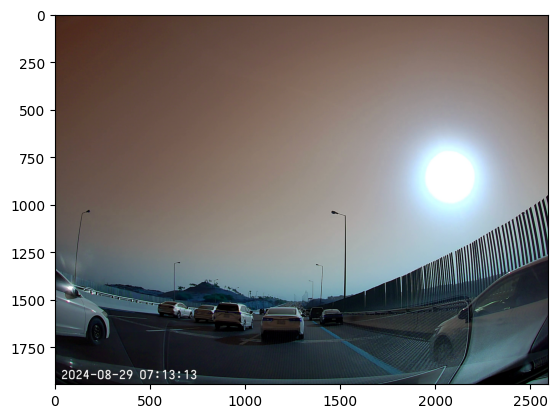

In [19]:
image = cv2.imread(image_path)
#image = image[:, :, ::-1]
plt.imshow(image)

## send the image to the model

In [20]:
results = model(image)


0: 480x640 1 solid-yellow-line, 315.8ms
Speed: 15.8ms preprocess, 315.8ms inference, 27.8ms postprocess per image at shape (1, 3, 480, 640)


## save the resulting image

In [22]:
# save the results
results[0].save('result.jpg')

'result.jpg'

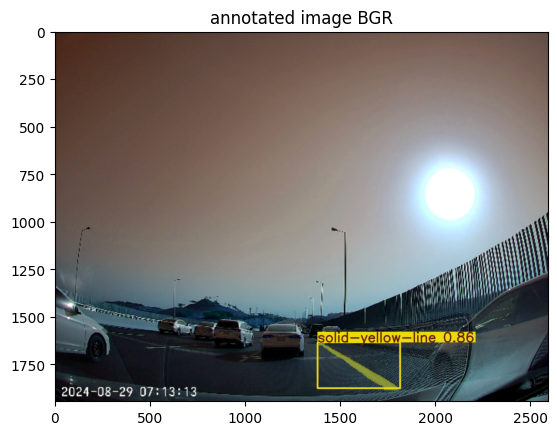

In [23]:
result_image = cv2.imread('/kaggle/working/result.jpg')
plt.title("annotated image BGR")
plt.imshow(result_image)

## convert BGR to RGB

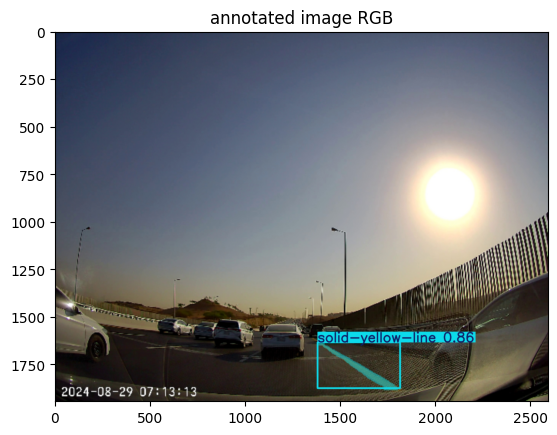

In [24]:
result_image = cv2.imread('/kaggle/working/result.jpg')
result_image = result_image[:, :, ::-1]
plt.title("annotated image RGB")
plt.imshow(result_image)

In [25]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.])
conf: tensor([0.8577])
data: tensor([[1.3807e+03, 1.6355e+03, 1.8150e+03, 1.8762e+03, 8.5775e-01, 1.0000e+00]])
id: None
is_track: False
orig_shape: (1944, 2592)
shape: torch.Size([1, 6])
xywh: tensor([[1597.8245, 1755.8485,  434.2599,  240.7026]])
xywhn: tensor([[0.6164, 0.9032, 0.1675, 0.1238]])
xyxy: tensor([[1380.6946, 1635.4972, 1814.9545, 1876.1998]])
xyxyn: tensor([[0.5327, 0.8413, 0.7002, 0.9651]])

## i will annotate the image with all the coordinates formats

In [69]:
results[0].boxes.xywhn[0][2:4]

tensor([0.1675, 0.1238])

In [61]:
pt1 = results[0].boxes.xywh[0][0:2].numpy()
pt2 = results[0].boxes.xywh[0][2:4].numpy()

In [65]:
top_left = (int(pt1[0] - pt2[0] / 2), int(pt1[1] - pt2[1] / 2))   # (center_x - width/2, center_y - height/2)
bottom_right = (int(pt1[0] + pt2[0] / 2), int(pt1[1] + pt2[1] / 2)) 

In [66]:
xywh_rect = cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

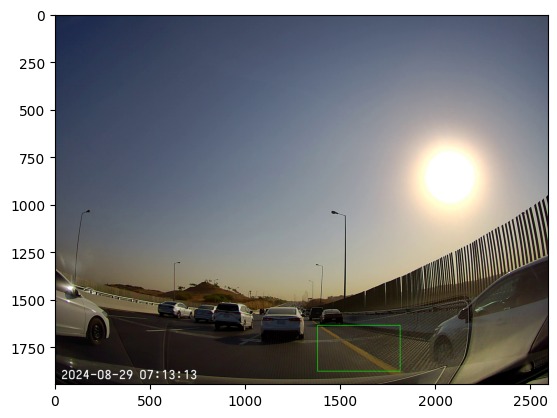

In [68]:
plt.imshow(xywh_rect[:, :, ::-1])

In [26]:
annotated_image = results[0]

In [28]:
help(annotated_image)

Help on Results in module ultralytics.engine.results object:

class Results(ultralytics.utils.SimpleClass)
 |  Results(orig_img, path, names, boxes=None, masks=None, probs=None, keypoints=None, obb=None, speed=None) -> None
 |  
 |  A class for storing and manipulating inference results.
 |  
 |  This class encapsulates the functionality for handling detection, segmentation, pose estimation,
 |  and classification results from YOLO models.
 |  
 |  Attributes:
 |      orig_img (numpy.ndarray): Original image as a numpy array.
 |      orig_shape (Tuple[int, int]): Original image shape in (height, width) format.
 |      boxes (Boxes | None): Object containing detection bounding boxes.
 |      masks (Masks | None): Object containing detection masks.
 |      probs (Probs | None): Object containing class probabilities for classification tasks.
 |      keypoints (Keypoints | None): Object containing detected keypoints for each object.
 |      obb (OBB | None): Object containing oriented boun

In [16]:
results[0].keypoints # is None

In [37]:
results[0].boxes.xyxy

tensor([[1403.4067, 1652.6827, 1772.3553, 1883.7063]])

In [18]:
results[0].boxes.conf

tensor([0.8061])

## remove the bounding box and keep the segmentation

In [19]:
#mask = results[0].masks.data.numpy()
original_image = results[0].orig_img
b_mask = np.zeros(original_image.shape[:2], np.uint8) #binary mask

#original_image = original_image[:, :, ::-1]

In [28]:
# counter results
counter = results[0].masks.xy.pop()
counter = counter.astype(np.int32) # change dtype
counter = counter.reshape(-1, 1, 2)

In [31]:
# drow the segmentiona
image_masked = cv2.drawContours(b_mask, [counter], -1, (255, 255, 255), cv2.FILLED)

In [32]:
type(image_masked)

numpy.ndarray

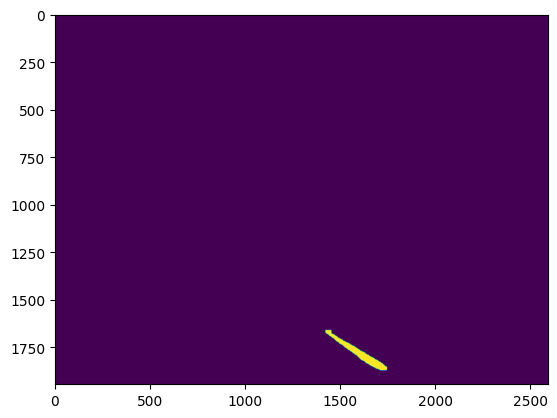

In [33]:
plt.imshow(image_masked)

In [39]:
image_masked_rgb = cv2.cvtColor(b_mask, cv2.COLOR_GRAY2BGR)

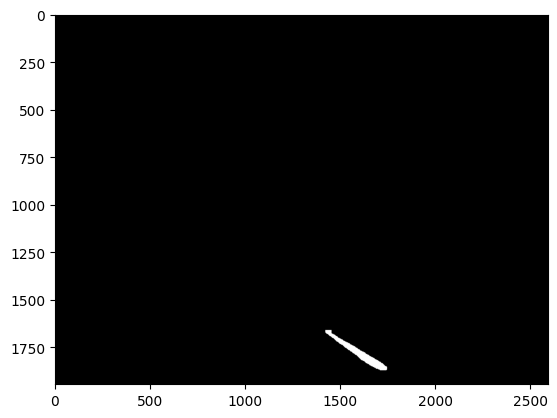

In [40]:
plt.imshow(image_masked_rgb)

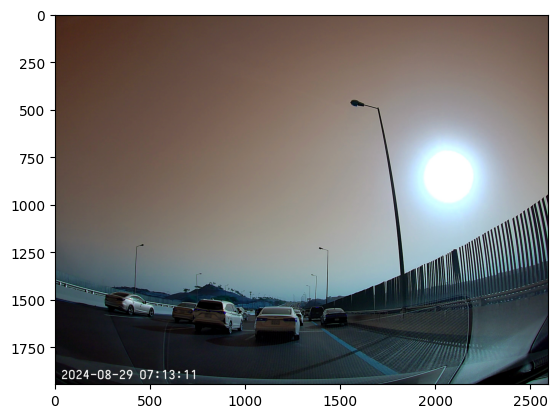

In [20]:
plt.imshow(original_image)

In [12]:
def extract_frames(input_video_path:str ,output_images_path:str  , frame_rate_per_second: int):
    """
    input_video_path: path to the video file
    output_images_path: path where extracted frames will be saved
    frame_rate_per_second: the rate at which to extract the frames

    example: if you set the frame_rate_per_second to 1, in a 15 seconds video it will extract 15 frames
    if it's set to 2 it will extract 30 images.
    """
    assert frame_rate_per_second > 0, "frame rate must be greater than 0"
    assert input_video_path.endswith('.mp4'), "input video must be in mp4 format"
    assert os.path.exists(input_video_path), "input video path does not exist"

    if not os.path.exists(output_images_path):
        os.makedirs(output_images_path, exist_ok=True)

    frame_count = 0
    counter = 0

    cap = cv2.VideoCapture(input_video_path)
    assert cap.isOpened(), "Error opening video file"

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            print("Reached the end of the video")
            break
        frame_count += 1
        if frame_count % int(cap.get(5) / frame_rate_per_second) == 0:
            counter +=1
            cv2.imwrite(f"{output_images_path}/frame_{frame_count}.jpg", frame)

    cap.release()
    print(f"Extracted {counter} frames successfully to the path: {output_images_path}")

In [13]:
extract_frames('/kaggle/input/cross-line10s/road_lane2s.mp4', '/kaggle/working/images', 1)

Reached the end of the video
Extracted 9 frames successfully to the path: /kaggle/working/images
